In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:

file1 = '../seafood_data_junho/seafood_2022-06-30.csv'
file2 = '../seafood_data_junho/갈치2022.csv'


In [4]:
file1 = pd.read_csv(file1)
file2 = pd.read_csv(file2)

In [5]:
df1 = pd.DataFrame(file1)
df2 = pd.DataFrame(file2)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80713 entries, 0 to 80712
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      80713 non-null  object
 1   어종      80713 non-null  object
 2   산지      80713 non-null  object
 3   규격      80713 non-null  object
 4   포장      80713 non-null  object
 5   수량      80713 non-null  object
 6   중량      80713 non-null  object
 7   평균가     80713 non-null  object
dtypes: object(8)
memory usage: 4.9+ MB


In [7]:
df1.columns

Index(['날짜', '어종', '산지', '규격', '포장', '수량', '중량', '평균가'], dtype='object')

In [8]:
df1.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [9]:
df1 = df1[df1.species=='(선)가자미']

In [10]:
df1.head(3)

,date,species,origin,standard,unit,amount,weight,avg_price
39394,2017-01-02,(선)가자미,속초,중,S/P,12,10,"8,000"
39395,2017-01-02,(선)가자미,속초,중,S/P,22,15,"10,000"
39396,2017-01-02,(선)가자미,기타,군산,대,S/P,9,"40,000"


In [11]:
df1.describe()

,date,species,origin,standard,unit,amount,weight,avg_price
count,8827,8827,8827,8827,8827,8827,8827,8827
unique,1453,1,49,72,11,451,61,1057
top,2017-03-25,(선)가자미,방어진,중,S/P,1,15,"10,000"
freq,20,8827,1862,5381,7543,1080,1632,678


## 데이터타입 변환

In [12]:
df1[df1.date == '날짜']

,date,species,origin,standard,unit,amount,weight,avg_price


### 평균가에 , 기호 없애기

In [13]:
df1['avg_price'] = df1.avg_price.str.replace(',', '').astype('int')
# df['avg_price'] = df.avg_price.str.replace(',', '').astype('int')

### 중량에 , 기호 없애기 (중량 float로 변환)

In [14]:
# df['weight'] = df.avg_price.str.replace(',', '').astype('float')
df1['weight'] = df1['weight'].astype('float')
# df['weight'] = df['weight'].astype('float')

### 수량에 , 기호 없애기

In [19]:
df1 = df1[df1.amount != 'S/P']
df1 = df1[df1.amount != 'kg']

In [20]:
df1['amount'] = df1.amount.str.replace(',', '').astype('int')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8820 entries, 39394 to 53342
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       8820 non-null   object 
 1   species    8820 non-null   object 
 2   origin     8820 non-null   object 
 3   standard   8820 non-null   object 
 4   unit       8820 non-null   object 
 5   amount     8820 non-null   int32  
 6   weight     8820 non-null   float64
 7   avg_price  8820 non-null   int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 551.2+ KB


In [22]:
df2.dtypes

날짜      object
어종      object
산지      object
규격      object
포장      object
수량       int64
중량     float64
평균가     object
dtype: object

In [24]:
df2.columns = ['date', 'species', 'origin', 'standard', 'unit', 'amount', 'weight', 'avg_price']

In [25]:
df2[df2.date == '날짜']

,date,species,origin,standard,unit,amount,weight,avg_price


In [26]:
df2['avg_price'] = df2.avg_price.str.replace(',', '').astype('int')

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2310 non-null   object 
 1   species    2310 non-null   object 
 2   origin     2310 non-null   object 
 3   standard   2310 non-null   object 
 4   unit       2310 non-null   object 
 5   amount     2310 non-null   int64  
 6   weight     2310 non-null   float64
 7   avg_price  2310 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 135.5+ KB


In [28]:
df = pd.concat([df1, df2], axis=0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11130 entries, 39394 to 2309
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       11130 non-null  object 
 1   species    11130 non-null  object 
 2   origin     11130 non-null  object 
 3   standard   11130 non-null  object 
 4   unit       11130 non-null  object 
 5   amount     11130 non-null  int64  
 6   weight     11130 non-null  float64
 7   avg_price  11130 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 739.1+ KB


### 날짜 데이터 년, 월, 일로 나누고 int형으로 변환

In [30]:
df['yyyy'], df['mm'], df['dd'] = df['date'].str.split('-').str

In [31]:
df.tail()

,date,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
2305,2022-07-06,(선)은갈치,제주도,4미,S/P,1,5.0,250000,2022,07,06
2306,2022-07-06,(선)은갈치,제주도,5미,S/P,3,4.8,273300,2022,07,06
2307,2022-07-06,(선)은갈치,제주도,6미,S/P,1,4.0,152000,2022,07,06
2308,2022-07-06,(선)은갈치,제주도,6미,S/P,6,4.8,248300,2022,07,06
2309,2022-07-06,(선)은갈치,제주도,6미,S/P,2,5.0,237500,2022,07,06


In [32]:
df = df.drop('date', axis=1)

In [33]:
for i in ['yyyy', 'mm', 'dd']:
  df[i] = list(map(int, df[i]))

In [34]:
df.dtypes

species       object
origin        object
standard      object
unit          object
amount         int64
weight       float64
avg_price      int32
yyyy           int64
mm             int64
dd             int64
dtype: object

#### 년 / 월 / 일 별 가격변동

In [35]:
df[df.yyyy != 2022].groupby('mm').mean()

,amount,weight,avg_price,yyyy,dd
mm,,,,,
1,30.135135,13.005000,77388.513514,2018.560811,16.354054
2,37.519952,12.048972,66138.694075,2018.448609,15.527207
3,48.033072,11.881201,55850.739774,2018.524804,16.438642
4,46.172619,12.022817,54005.059524,2018.689484,15.246032
5,35.692982,12.139348,42513.283208,2018.561404,15.743108
6,24.978308,12.145879,33561.388286,2018.498915,14.896963
7,32.467988,11.645274,39308.079268,2018.445122,15.704268
8,31.536082,11.516495,44603.505155,2018.327835,16.531959
9,46.658252,11.451845,50320.000000,2018.400000,15.566990


### 년/월/일 별 평균가 확인

<AxesSubplot:xlabel='dd'>

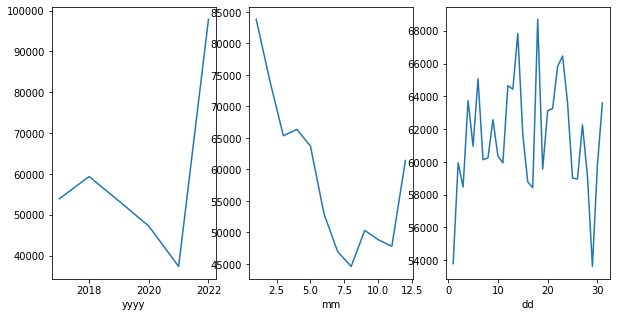

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
Years = df.groupby('yyyy').mean()
Years['avg_price'].plot(x=df.yyyy)
plt.subplot(132)
# Months = df[df.yyyy != 2022].groupby('mm').mean()
Months = df.groupby('mm').mean()
Months['avg_price'].plot(x=df.mm)
plt.subplot(133)
Days = df.groupby('dd').mean()
Days['avg_price'].plot(x=df.dd)

#### 산지별 가격분포

Text(0, 0.5, 'origin')

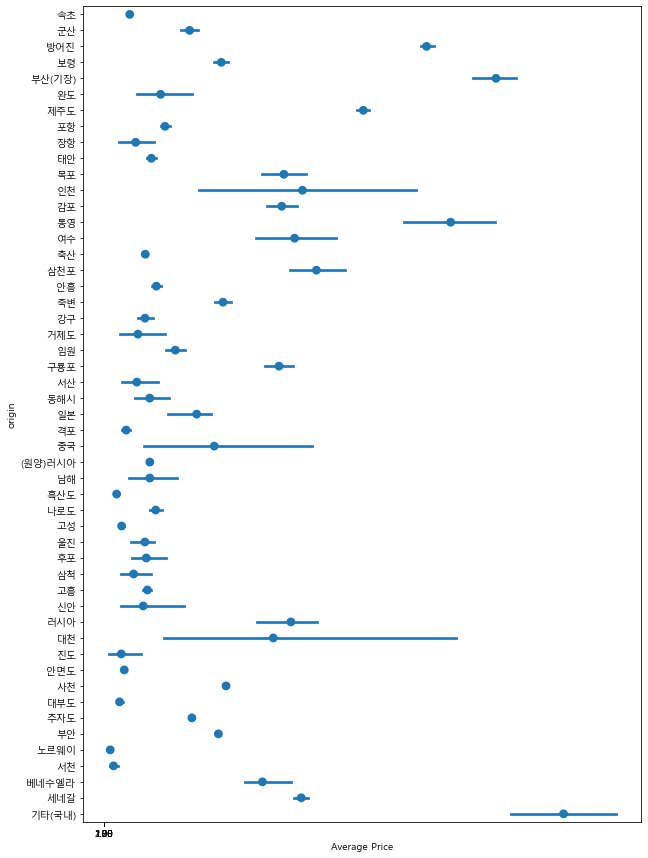

In [37]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=df, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [39]:
gj_pdf = df[df.species=='(선)가자미']

In [40]:
gj_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8820 entries, 39394 to 53342
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    8820 non-null   object 
 1   origin     8820 non-null   object 
 2   standard   8820 non-null   object 
 3   unit       8820 non-null   object 
 4   amount     8820 non-null   int64  
 5   weight     8820 non-null   float64
 6   avg_price  8820 non-null   int32  
 7   yyyy       8820 non-null   int64  
 8   mm         8820 non-null   int64  
 9   dd         8820 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 723.5+ KB


Text(0, 0.5, 'origin')

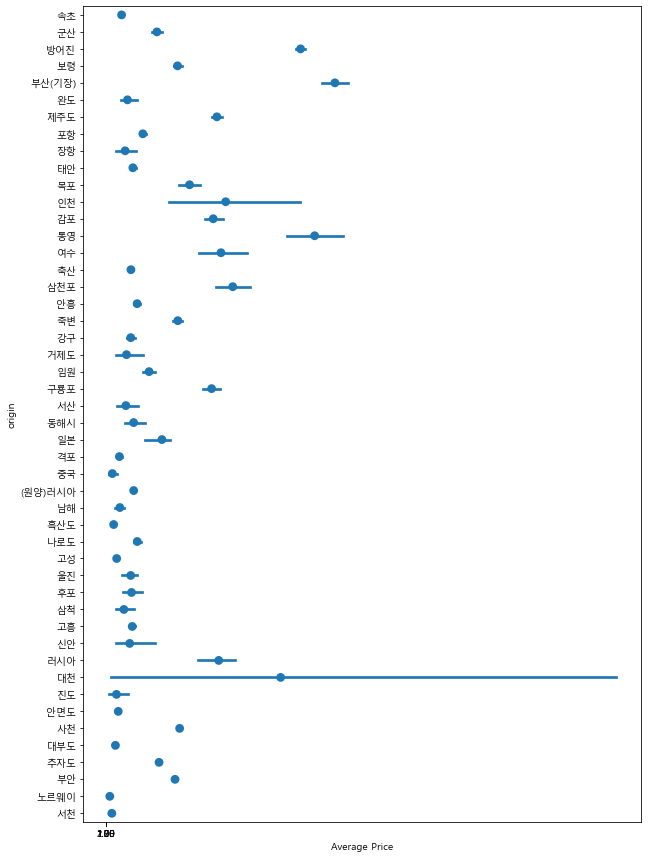

In [41]:
plt.rcParams['font.family']= 'Malgun Gothic'

plt.figure(figsize=(10, 15))
sns.pointplot(x='avg_price', y='origin', data=gj_pdf, join=False)
plt.xticks(np.linspace(1, 2, 5))
plt.xlabel('Average Price')
plt.ylabel('origin')

In [42]:
gj_pdf.head()

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
39394,(선)가자미,속초,중,S/P,12,10.0,8000,2017,1,2
39395,(선)가자미,속초,중,S/P,22,15.0,10000,2017,1,2
39402,(선)가자미,군산,중,kg,12,1.0,3500,2017,1,3
39403,(선)가자미,방어진,2미,c/s(상자),6,16.0,80000,2017,1,3
39404,(선)가자미,방어진,3미,c/s(상자),3,16.0,80000,2017,1,3


In [43]:
gj_pdf['origin'].count()

8820

In [44]:
gj_pdf['origin'].value_counts()

방어진        1862
제주도        1086
속초          956
죽변          697
군산          536
임원          442
안흥          375
축산          370
보령          325
부산(기장)      276
목포          227
태안          217
포항          208
감포          188
통영          183
삼천포         152
완도          126
구룡포         106
동해시          79
나로도          65
여수           58
강구           52
삼척           38
인천           35
격포           27
신안           21
후포           15
고성           14
서천           13
서산           12
대부도          12
일본            7
울진            5
장항            5
대천            5
중국            4
진도            4
러시아           3
거제도           3
고흥            2
남해            2
흑산도           1
안면도           1
사천            1
(원양)러시아       1
추자도           1
부안            1
노르웨이          1
Name: origin, dtype: int64

### 500 이상을 가진 방어진, 제주도, 속초, 죽변만을 쿼리

In [45]:
origin_mask = (gj_pdf.origin == '방어진')|(gj_pdf.origin == '제주도')|(gj_pdf.origin == '속초')|(gj_pdf.origin == '죽변')

gj_pdf = gj_pdf.loc[origin_mask, :]

In [46]:
gj_pdf['origin'].value_counts()

방어진    1862
제주도    1086
속초      956
죽변      697
Name: origin, dtype: int64

In [47]:
gj_pdf['standard'].value_counts()

중          2390
대           461
2단          435
20미         220
3단          174
1단          132
25미          85
14미          79
6미           65
8미           54
5미           41
10미          41
5단           39
12미          37
15미          36
4단           34
30미          28
18미          23
소            22
진통           21
9미           17
16미          17
4미           14
11미          14
3미           13
17미          13
13미          12
21미          10
7미            9
22미           6
26미           6
23미           6
40미           5
27미           5
2미            5
1미            4
특대            4
28미           3
19미           2
65미           2
50미           2
24미           2
600/700       2
34미           1
43미           1
400/500       1
23/24미        1
35미           1
6단            1
38/39미        1
32/33미        1
대중            1
500/600       1
24/25미        1
Name: standard, dtype: int64

## 중 규격이 압도적으로 많아서 정확도 낮을 가능성 있음

In [48]:
standard_mask = (gj_pdf.standard == '중')|(gj_pdf.standard == '대')|(gj_pdf.standard == '2단')|(gj_pdf.standard == '20미')

gj_pdf = gj_pdf.loc[standard_mask, :]

In [49]:
gj_pdf['standard'].value_counts()

중      2390
대       461
2단      435
20미     220
Name: standard, dtype: int64

#### 추려낸 위 규격에서 가장 많은 포장을 차지하는 S/P 포장으로 단일화

In [50]:
gj_pdf['unit'].value_counts()

S/P        3252
c/s(상자)     223
kg           17
box          13
가구            1
Name: unit, dtype: int64

In [51]:
gj_pdf = gj_pdf[gj_pdf.unit == 'S/P']

In [52]:
gj_pdf.head(3)

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd
39394,(선)가자미,속초,중,S/P,12,10.0,8000,2017,1,2
39395,(선)가자미,속초,중,S/P,22,15.0,10000,2017,1,2
39410,(선)가자미,속초,중,S/P,35,10.0,8900,2017,1,3


In [53]:
gj_pdf[gj_pdf.unit != 'S/P']

,species,origin,standard,unit,amount,weight,avg_price,yyyy,mm,dd


In [54]:
gj_pdf = gj_pdf.drop(['species', 'unit'], axis=1)

gj_pdf.head()

,origin,standard,amount,weight,avg_price,yyyy,mm,dd
39394,속초,중,12,10.0,8000,2017,1,2
39395,속초,중,22,15.0,10000,2017,1,2
39410,속초,중,35,10.0,8900,2017,1,3
39412,제주도,대,23,14.0,129700,2017,1,3
39413,제주도,대,1,15.0,100000,2017,1,3


### 범주형 데이터 OHE 수행

In [56]:
gj_pdf = pd.get_dummies(gj_pdf, columns=['origin', 'standard'])

In [57]:
gj_pdf.head(3)

,amount,weight,avg_price,yyyy,mm,dd,origin_방어진,origin_속초,origin_제주도,origin_죽변,standard_20미,standard_2단,standard_대,standard_중
39394,12,10.0,8000,2017,1,2,0,1,0,0,0,0,0,1
39395,22,15.0,10000,2017,1,2,0,1,0,0,0,0,0,1
39410,35,10.0,8900,2017,1,3,0,1,0,0,0,0,0,1


In [58]:
len(gj_pdf.columns)

14

In [59]:
gj_pdf.describe()

,amount,weight,avg_price,yyyy,mm,dd,origin_방어진,origin_속초,origin_제주도,origin_죽변,standard_20미,standard_2단,standard_대,standard_중
count,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000
mean,42.830566,13.189053,63176.968020,2018.361009,5.360394,15.771525,0.341943,0.251845,0.298893,0.107319,0.067651,0.108549,0.136839,0.686962
std,100.788152,7.152069,55801.022739,1.336170,3.472156,8.554406,0.474434,0.434139,0.457843,0.309565,0.251184,0.311120,0.343730,0.463801
min,1.000000,1.000000,900.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,9600.000000,2017.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,13.000000,60000.000000,2018.000000,4.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33.000000,16.000000,110000.000000,2019.000000,8.000000,23.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1121.000000,154.000000,350000.000000,2021.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 시각화

In [61]:
num_cols = ['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd']
num_gj_pdf = gj_pdf[num_cols]

<AxesSubplot:>

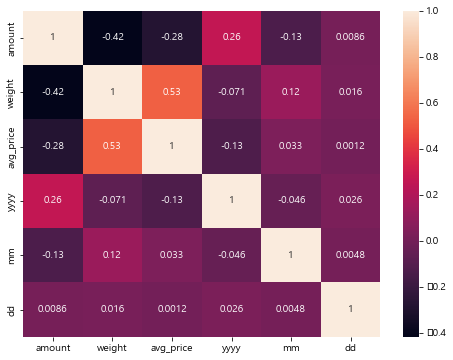

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_gj_pdf.corr(), annot=True)

In [63]:
print(gj_pdf.columns)
print("컬럼 수 :", len(gj_pdf.columns))

Index(['amount', 'weight', 'avg_price', 'yyyy', 'mm', 'dd', 'origin_방어진',
       'origin_속초', 'origin_제주도', 'origin_죽변', 'standard_20미', 'standard_2단',
       'standard_대', 'standard_중'],
      dtype='object')
컬럼 수 : 14


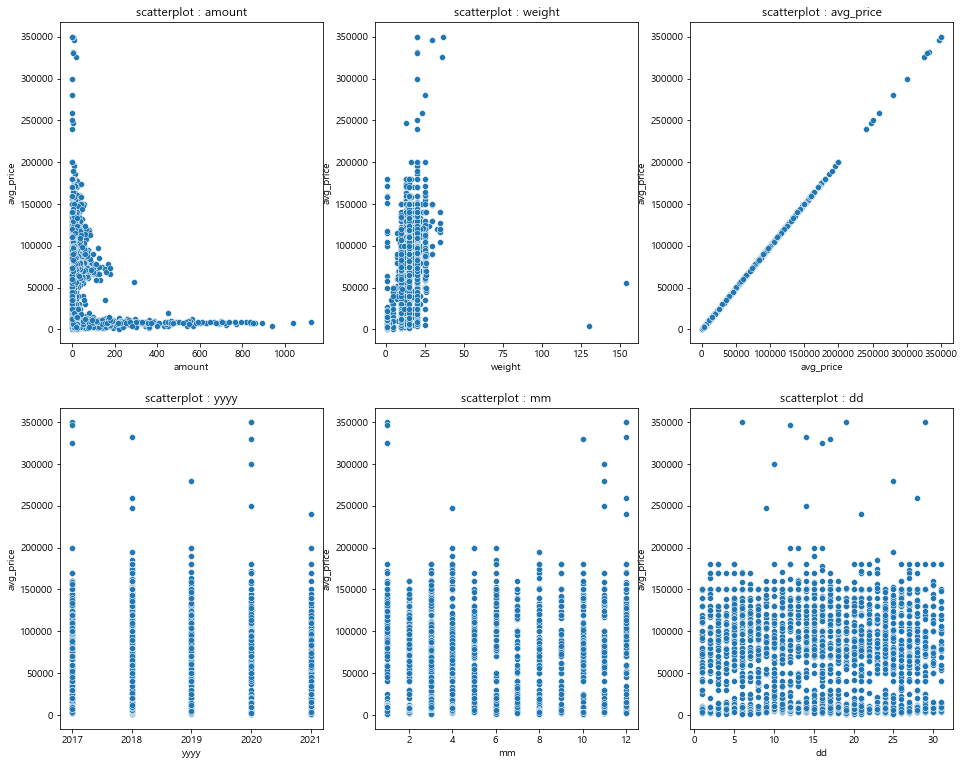

In [64]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_gj_pdf.columns)):
    sns.scatterplot(data = num_gj_pdf, y = 'avg_price' ,x = num_gj_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_gj_pdf.columns[i])

plt.show()

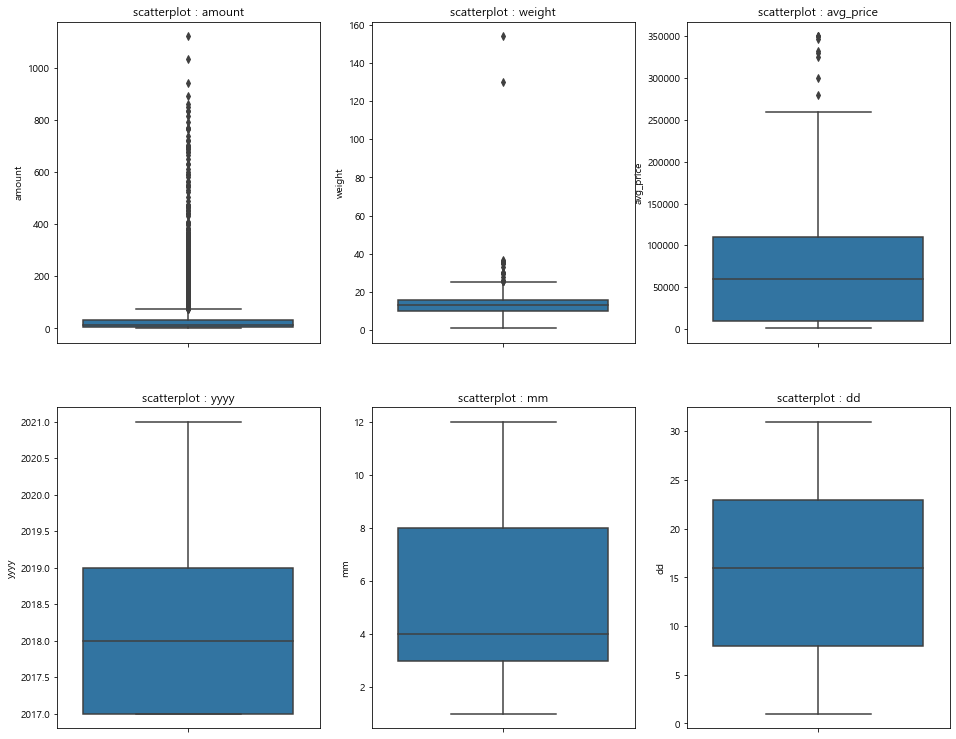

In [65]:
fig, ax = plt.subplots(nrows = 2, ncols =3)
fig.set_size_inches(16,13)
for i in range(len(num_gj_pdf.columns)):
    sns.boxplot(data = num_gj_pdf, y = num_gj_pdf.columns[i], ax= ax[int(i//3)][int(i%3)])
    ax[int(i//3)][int(i%3)].set_title("scatterplot : " + num_gj_pdf.columns[i])

plt.show()

### 결측치 제거

amout > 1000 이상 데이터 제거
-> 제거 안해도 괜찮을 거라고 봄

In [66]:
gj_pdf['amount'].sort_values()

45072       1
45522       1
40606       1
46901       1
49372       1
         ... 
52140     861
50049     890
49145     941
50108    1035
50211    1121
Name: amount, Length: 3252, dtype: int64

In [470]:
# eg_pdf = eg_pdf[eg_pdf.amount < 1000]

weight > 100 이상 데이터 제거

In [67]:
gj_pdf['weight'].sort_values()

53341      1.0
49611      1.0
49617      1.0
49628      1.0
49635      1.0
         ...  
40553     35.0
39573     36.0
39459     37.0
44964    130.0
52141    154.0
Name: weight, Length: 3252, dtype: float64

In [70]:
gj_pdf = gj_pdf[gj_pdf.weight < 100]

avg_price > 350000 제거할 지 말지 고민 일단 돌려보자

In [72]:
gj_pdf['avg_price'].sort_values()

50817       900
44356      1000
51624      1000
44370      1200
51010      1300
          ...  
46678    332000
39537    346600
51482    350000
39459    350000
51434    350000
Name: avg_price, Length: 3250, dtype: int32

In [77]:
gj_pdf.count()

amount          3250
weight          3250
avg_price       3250
yyyy            3250
mm              3250
dd              3250
origin_방어진      3250
origin_속초       3250
origin_제주도      3250
origin_죽변       3250
standard_20미    3250
standard_2단     3250
standard_대      3250
standard_중      3250
dtype: int64

In [109]:
gj_pdf.to_csv('cleaned_gj.csv')

## 선형 회귀

In [78]:
gj_pdf.head()

,amount,weight,avg_price,yyyy,mm,dd,origin_방어진,origin_속초,origin_제주도,origin_죽변,standard_20미,standard_2단,standard_대,standard_중
39394,12,10.0,8000,2017,1,2,0,1,0,0,0,0,0,1
39395,22,15.0,10000,2017,1,2,0,1,0,0,0,0,0,1
39410,35,10.0,8900,2017,1,3,0,1,0,0,0,0,0,1
39412,23,14.0,129700,2017,1,3,0,0,1,0,0,0,1,0
39413,1,15.0,100000,2017,1,3,0,0,1,0,0,0,1,0


In [79]:
X = gj_pdf.drop(columns='avg_price')
y = gj_pdf['avg_price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, shuffle =True, test_size = 0.2)

In [82]:
gj_model_lr = LinearRegression()
gj_model_lr.fit(X_train, y_train)
gj_lr_y_pred = gj_model_lr.predict(X_test)

In [83]:
print(gj_model_lr.score(X_train, y_train))
print(gj_model_lr.score(X_test, y_test))

0.7163192033008987
0.7118390362131286


In [84]:
MSE = mean_squared_error(y_test, gj_lr_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_lr_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 936455168.85175, RMSE : 30601.55501
r2_score :  0.7118390362131286


In [85]:
y_test = np.array(y_test)

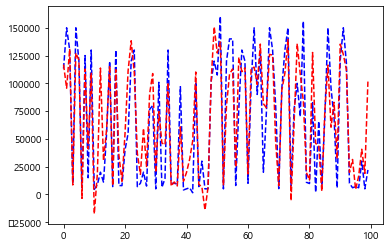

In [87]:
y_test = np.array(y_test)

real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(gj_lr_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

In [88]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [89]:
gj_model_lr.fit(x_train_scaled, y_train)
gj_y_pred_scaled = gj_model_lr.predict(x_test_scaled)

In [90]:
MSE = mean_squared_error(y_test, gj_y_pred_scaled)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_y_pred_scaled)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 936065812.71463, RMSE : 30595.19264
r2_score :  0.7119588467961266


## 랜덤포레스트

In [91]:
gj_model_rf = RandomForestRegressor()

gj_model_rf.fit(X_train, y_train)
gj_rf_y_pred = gj_model_rf.predict(X_test)

In [92]:
MSE = mean_squared_error(y_test, gj_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 520169134.02923, RMSE : 22807.21671
r2_score :  0.8399363429454527


In [93]:
rf_parameters = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 6, 9, 12],
    # 'max_depth': [5, 6, 9, 12],
    # 'min_samples_split': [0.01, 0.02, 0.1, 0.15],
    # 'max_features': ['auto', 'sqrt'],
    'random_state':[99]
}

cv = KFold(n_splits=6)

rf = RandomForestRegressor()
rf_grid_cv = GridSearchCV(rf, param_grid=rf_parameters, cv=cv, n_jobs=1, scoring='r2')
rf_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', rf_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': None, 'n_estimators': 250, 'random_state': 99}
최적 예측 정확도: 0.8032


In [94]:
gj_model_rf = rf_grid_cv.best_estimator_
gj_rf_y_pred = gj_model_rf.predict(X_test)

In [95]:
MSE = mean_squared_error(y_test, gj_rf_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_rf_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 504893771.03975, RMSE : 22469.84137
r2_score :  0.8446367957462411


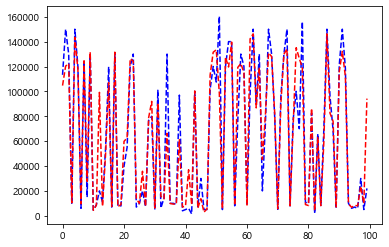

In [96]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(gj_rf_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## XGBRegressor

In [97]:
gj_model_xgb = XGBRegressor()

gj_model_xgb.fit(X_train, y_train)
gj_xgb_y_pred = gj_model_xgb.predict(X_test)

In [98]:
MSE = mean_squared_error(y_test, gj_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 552199299.78994, RMSE : 23498.92125
r2_score :  0.8300801920661992


xgb에 gcv 해본 것

In [99]:
xg_parameters ={'max_depth' : [3,4,5,6] , 
                # 'n_estimators': [12,24,32], 
                'n_estimators': [100,200,300], 
                'learning_rate':[0.01, 0.1], 
                # 'learning_rate':[0.1, 0.3, 0.5], 
                'gamma': [1, 2, 4], 
                'random_state':[99]}

xgb = XGBRegressor()
xgb_grid_cv = GridSearchCV(xgb, param_grid=xg_parameters, cv=6, n_jobs=-1, scoring='r2')
xgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', xgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(xgb_grid_cv.best_score_))


최적 하이퍼 파라미터: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 99}
최적 예측 정확도: 0.8079


In [100]:
gj_model_xgb = xgb_grid_cv.best_estimator_
gj_xgb_y_pred = gj_model_xgb.predict(X_test)

In [101]:
MSE = mean_squared_error(y_test, gj_xgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_xgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 508109076.96920, RMSE : 22541.27496
r2_score :  0.8436473990443835


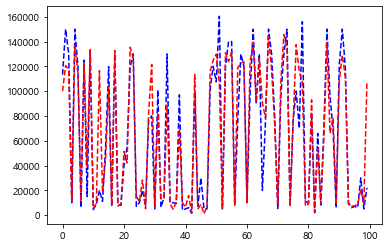

In [102]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(gj_xgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()

## lightGBM

In [103]:
gj_model_lgb = LGBMRegressor()

gj_model_lgb.fit(X_train, y_train)
gj_lgb_y_pred = gj_model_lgb.predict(X_test)

In [104]:
MSE = mean_squared_error(y_test, gj_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 620018260.81180, RMSE : 24900.16588
r2_score :  0.8092113049895822


In [105]:
# lgb_parameters ={'max_depth' : [3,4,5,6] ,  
#                 'n_estimators': [100,300,500], 
#                 'learning_rate':[0.01, 0.05, 0.1],   
#                 'random_state':[99]}

lgb_parameters ={
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0] 
                }

lgb = LGBMRegressor()
lgb_grid_cv = GridSearchCV(lgb, param_grid=lgb_parameters, cv=6, n_jobs=-1, scoring='r2')
lgb_grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', lgb_grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

최적 하이퍼 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
최적 예측 정확도: 0.8087


In [106]:
gj_model_lgb = lgb_grid_cv.best_estimator_
gj_lgb_y_pred = gj_model_lgb.predict(X_test)

In [107]:
MSE = mean_squared_error(y_test, gj_lgb_y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, gj_lgb_y_pred)

print('MSE : {0:.5f}, RMSE : {1:.5f}'.format(MSE, RMSE))
print("r2_score : ", r2)

MSE : 607959497.27953, RMSE : 24656.83470
r2_score :  0.8129219630510854


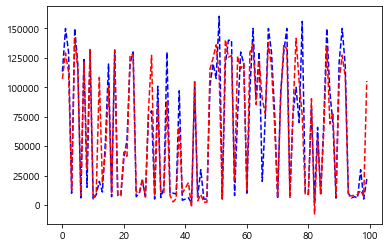

In [108]:
real = []
pred = []
index = []

for i in range(100):
  index.append(i)
  real.append(y_test[i])
  pred.append(gj_lgb_y_pred[i])
  
plt.plot(index, real, 'b--', label="Real")
plt.plot(index, pred, 'r--', label="Pred")
plt.show()